### TODO Exercise 5. ex
(a) Read the image lena.png and convert it to grayscale.

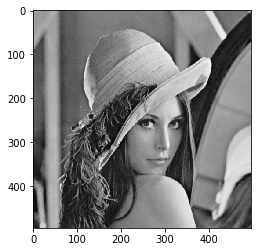

array([[160.80013 , 162.80797 , 162.80797 , ..., 171.45676 , 172.23178 ,
        152.41035 ],
       [161.80405 , 163.58301 , 162.80797 , ..., 171.22787 , 175.71841 ,
        155.42213 ],
       [163.29387 , 163.65428 , 162.28995 , ..., 169.69487 , 171.70271 ,
        155.18219 ],
       ...,
       [ 50.322575,  44.299046,  50.208126, ..., 101.09691 , 102.66905 ,
         97.44264 ],
       [ 45.302967,  42.291203,  51.212048, ..., 100.48653 , 103.755295,
         99.30392 ],
       [ 43.295124,  43.295124,  55.227734, ..., 101.49045 , 105.24512 ,
        104.39479 ]], dtype=float32)

In [67]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2 
import numpy as np
imageLena = mpimg.imread("./data/lena.png")
imageLena  = imageLena *256
imageLena  
output = cv2.cvtColor(
    imageLena, 
    cv2.COLOR_RGB2GRAY    
)
gray__imageLena= output .copy()

plt.imshow(gray__imageLena, cmap = 'gray' )
plt.show()
(h, w) = gray__imageLena.shape[:2] 


### 2.b.1) Add a watermark to the image with and without applying NVF function the different values of ${σ ^z _2}$ (10, 25, 50, 75) and D.  Choose the window size appropriate to used image.

The Noise Visibility Function (NVF) describes noise visibility in an image. The most known
form of NVF is given as:

${NVF = \frac{1}{1 + \theta \sigma _{x} ^{2} (i, j)}}$
<br>
${\theta = \frac{D}{ \sigma _{x_{max}} ^{2} }}$

- $\sigma_{x_{max}}$ (i, j) denotes the local variance of the image in a window centred on the pixel with
coordinates (i, j), 
- θ plays the role of contrast adjustment for every particular image, ${ \sigma _{x_{max}} ^{2} }$ is
the maximum local variance for a given image 
- D is an experimentally determined parameter.
- The final embedding equation is: 
$y _{i,j} = x _{i,j} + (1 − N V F )z _{i,j}$



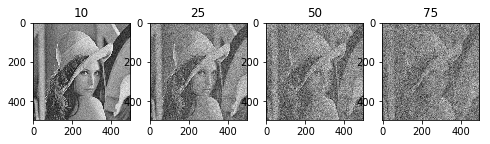

0.0001630953068290187
0.0017940483751192058
0.0034250014434093925
0.00505595451169958
0.006686907579989767


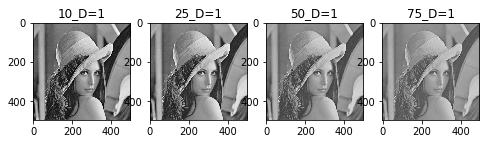

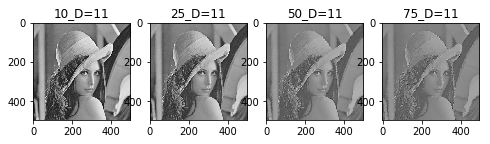

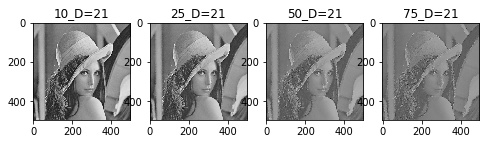

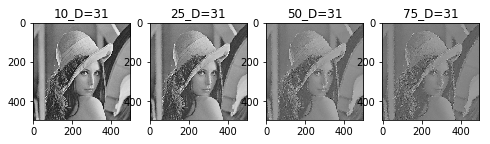

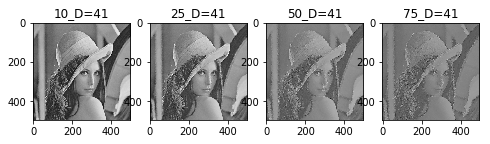

In [87]:
# Here we generate the different watermarks for variances [10, 25, 50, 75]

def generateWatermark(window_size, sigma, mu=0, ):
    (row, col) = window_size
    return np.random.normal(mu,sigma,(row,col))

watermark_size = gray__imageLena.shape[:2]
watermark_list = [
    (generateWatermark(watermark_size, sigma), sigma)
    for sigma in [10, 25, 50, 75]
]

# Add watermark to the image without the NVF function 
#with equation $y = x + z$ which is equivalent to adding gaussian noise 

def addWatermark(img, z):
    return np.add(img, z)

def showImages(images, titles):
    fig=plt.figure(figsize=(8, 8))
    columns = 4
    rows = round(len(images)/columns)
    k=1
    for i in range(1, columns*rows +1):
        fig.add_subplot(rows, columns, i)
        img = images[k-1]
        plt.imshow(img, cmap = 'gray')
        plt.title(titles[k-1])
        k+= 1
    plt.show()

noNVFwatermarked_Img_list = [
    (addWatermark(gray__imageLena, watermark[0]), str(watermark[1])) 
    for watermark in watermark_list
]

showImages(
    [im[0] for im in noNVFwatermarked_Img_list],
    [im[1] for im in noNVFwatermarked_Img_list]
)

# Here we implement the description functions
from scipy import ndimage
lena_variance_matrix = ndimage.generic_filter(gray__imageLena, np.var, size=4)
maxLocalVar = lena_variance_matrix.max()
Ds = range(1,51, 10)

for D in Ds:
    theta = D / maxLocalVar
    print(theta)
    NVF_matrix =  1/(1+ theta*lena_variance_matrix)
    
    def embeddingEquation(NVF_matrix, x, z):
        return np.add(x, np.multiply((1-NVF_matrix ), z))
    
    NVFwatermarked_Img_list = [
        (
            embeddingEquation(NVF_matrix, gray__imageLena, watermark[0]), 
            str(watermark[1]) + "_D=" + str(D)
        ) 
        for watermark in watermark_list
    ]
    showImages(
        [im[0] for im in NVFwatermarked_Img_list],
        [im[1] for im in NVFwatermarked_Img_list]
    )


### 2.c) Report the dependency between the parameters ${σ ^z _2}$ , D and original image.

From the small experiment we ran above we determine that greater values of D make the influece of the window bigger.
The ${σ ^z _2}$ as expected increases the noise in the image.